# FFT Audio Data EDA

## Python note book to do the following
* Read Audio FFT(Fast Fourier transformed) transformed data from CVS.
* Drop unwanted Column.
* Each instance of audio FFT data is in String format, Convert it to numpy array.
* Create OneHotEncoded Target variable.
* Split the Data for training, testing and Validating model.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import os

### Read the data from CSV

In [84]:
df = pd.read_csv("Dataset/surrounding_audio_dataset_FFT.csv")

### Drop Unwanted Data

In [85]:
df.columns

Index(['Unnamed: 0', 'audio_spectrum_vec', 'target'], dtype='object')

In [86]:
df = df.drop(["Unnamed: 0"], axis=1)

In [87]:
df.head()

,audio_spectrum_vec,target
0,"2622.95, 2240.01, 2147.05, 3862.66, 2162.50, 2...",FANS_ON
1,"1005.18, 1711.41, 2957.96, 3726.38, 3499.52, 3...",FANS_ON
2,"5097.55, 6840.28, 6229.43, 5413.84, 3086.14, 1...",FANS_ON
3,"5051.88, 5329.28, 6198.93, 5951.65, 6787.53, 8...",FANS_ON
4,"1492.61, 1623.57, 1693.71, 2177.69, 2955.78, 3...",FANS_ON


In [88]:
df["target"].unique()

array(['FANS_ON', 'WHISTLE', 'SILENT_ROOM', 'GLASS_BREAKING'],
      dtype=object)

### Create Two var, one holding Audio FFT vec data and other Target variable

In [89]:
feature_x = df['audio_spectrum_vec'].copy()
target_y = df["target"].copy()

In [90]:
target_y.describe()

count         600
unique          4
top       WHISTLE
freq          150
Name: target, dtype: object

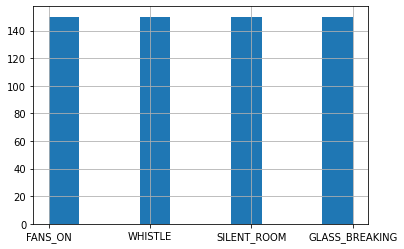

In [91]:
target_y.hist()

In [92]:
dataset = []

for f in feature_x:
    str_data_list = f.split(",")
    str_data_np = np.array([str_data_list])
    data_np = str_data_np.astype(np.float)
    dataset.append(data_np)
    
dataset_np = np.array(dataset)

In [93]:
dataset_np.shape

(600, 1, 248)

### OneHot encoding target variable

In [94]:
oh_enc = OneHotEncoder(sparse=False)

In [95]:
target_y = target_y.to_numpy()

In [96]:
target_y = target_y.reshape(-1,1)

In [97]:
target_encoded = oh_enc.fit_transform(target_y)

In [98]:
target_encoded.shape

(600, 4)

### Ploting Frequency Spectrum

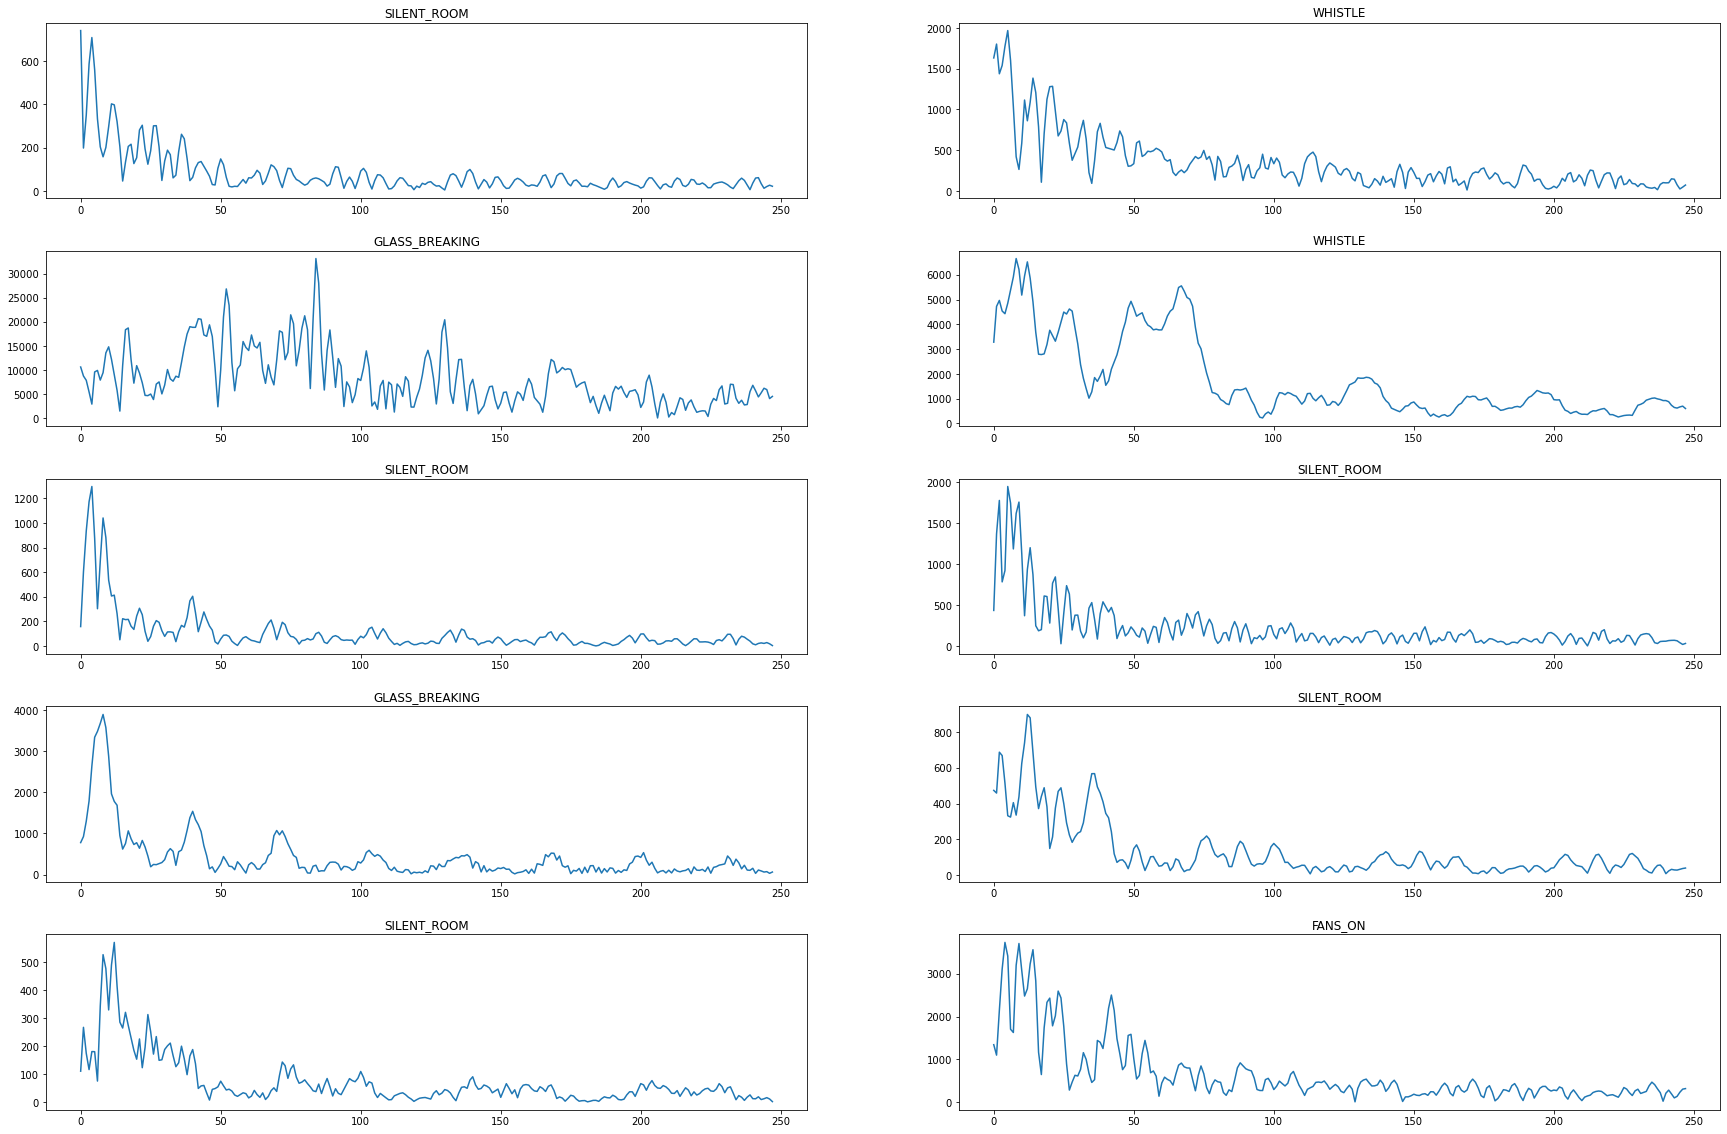

In [116]:
def plot_fft_audio_spectrum():
    fig = plt.figure(figsize=(30, 20))
    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    for i in range(10):
        randvar = np.random.randint(0,target_encoded.shape[0])
        plt.subplot(5, 2, i+1)
        plt.title(df["target"][randvar])
        plt.plot(dataset_np[randvar].reshape(-1, 1))


plot_fft_audio_spectrum()


In [100]:
X_train, X_test, y_train, y_test = train_test_split(dataset_np,target_encoded,test_size=0.2,train_size=0.8,random_state=20,shuffle = True)

In [101]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape
)

(480, 1, 248) (120, 1, 248) (480, 4) (120, 4)


In [102]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

### Viausalizing Data in Lower dimension using PCA

In [103]:
import plotly.express as px
from sklearn.decomposition import PCA


In [112]:
pca = PCA(n_components=10)

In [109]:
squeeqed_data = np.squeeze(dataset_np)
squeeqed_data.shape

(600, 248)

In [113]:
components = pca.fit_transform(squeeqed_data)
total_var = pca.explained_variance_ratio_.sum() * 100

In [118]:
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['target'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# fig = px.scatter(
#     components, x=0, y=1, color=df['target'],
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2'}
# )
# fig.show()

# DL model Creating, Training, and Converting to C arrays